In [5]:
import sys
print(sys.version)
import datetime
import matplotlib.pyplot as plt
print(datetime.datetime.now())

# Mac number for the Manta Camera is: 000F314F7A86

3.11.13 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 13:03:15) [MSC v.1929 64 bit (AMD64)]
2025-09-10 08:52:39.981959


In [2]:
print('start')
from vmbpy import *
with VmbSystem.get_instance() as vmb:
    cams = vmb.get_all_cameras()
    print(cams)

start
(<vmbpy.camera.Camera object at 0x000002597EE7D390>,)


In [5]:
import os
os.chdir(r"C:\Users\Lab10\Desktop\Automated RHEED Image Acquisition\Acquiring Images Via Python Script Tests")
import cv2

with VmbSystem.get_instance() as vmb:
    interface = vmb.get_all_interfaces()[0]
    for feat in interface.get_all_features():
        print(feat)

StringFeature(name=InterfaceID, value=Omicron Lab10, max_length=13)
StringFeature(name=InterfaceDisplayName, value=Omicron Lab10, max_length=13)
EnumFeature(name=InterfaceType, value=GEV)
CommandFeature(name=DeviceUpdateList)
IntFeature(name=DeviceCount, value=0, range=(0, 4294967295), increment=1)
IntFeature(name=DeviceSelector)
StringFeature(name=DeviceID)
StringFeature(name=DeviceVendorName)
StringFeature(name=DeviceModelName)
EnumFeature(name=DeviceType)
StringFeature(name=DeviceDisplayName)
EnumFeature(name=DeviceAccessStatus)
IntFeature(name=InterfaceBeatRate, value=500, range=(10, 10000), increment=1)
IntFeature(name=InterfaceHailPace, value=4, range=(1, 10), increment=1)
IntFeature(name=InterfacePingPace, value=2, range=(1, 10), increment=1)
EnumFeature(name=DiscoveryMode, value=Off)
EnumFeature(name=DiscoveryBroadcastMode, value=Local)
CommandFeature(name=ActionCommand)
IntFeature(name=ActionDeviceKey, value=0, range=(0, 4294967295), increment=1)
IntFeature(name=ActionGroupKey

In [3]:
# Software trigger for continuous image acquisition
import time
from vmbpy import *
import numpy as np
import os
import datetime

os.chdir(r"C:\Users\Lab10\Desktop\Automated RHEED Image Acquisition\Acquiring Images Via Python Script Tests")

def handler(cam: Camera, stream: Stream, frame: Frame):
    print('Frame acquired: {}'.format(frame), flush=True)
    cam.queue_frame(frame)
    print(type(frame))
    print(dir(frame))
    placeholder = frame.as_numpy_ndarray()
    print(np.shape(placeholder))
    print(type(placeholder))
    print(placeholder[0][0])
    now = datetime.datetime.now()
    valid_now = now.strftime('%Y-%m-%d_%H-%M-%S-%f.npy')
    np.save(valid_now, placeholder)
    print(frame)

def main():
    with VmbSystem.get_instance() as vmb:
        cam = vmb.get_all_cameras()[0]

        with cam:
            cam.TriggerSource.set('Software')
            cam.TriggerSelector.set('FrameStart')
            cam.TriggerMode.set('On')
            cam.AcquisitionMode.set('Continuous')

            try:
                cam.start_streaming(handler)
                time.sleep(1)
                for i in range(5):
                    cam.TriggerSoftware.run()
                    time.sleep(1)
                # cam.TriggerSoftware.run()
                # time.sleep(1)
                cam.TriggerSoftware.run()
            finally:
                cam.stop_streaming()
                print('finished')

if __name__ == '__main__':
    main()

Frame acquired: Frame(id=1, status=FrameStatus.Complete, buffer=0x25900348520)
<class 'vmbpy.frame.Frame'>
['_Frame__chunk_cb_exception', '_Frame__chunk_cb_wrapper', '__class__', '__deepcopy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_allocation_mode', '_buffer', '_frame', '_set_buffer', 'access_chunk_data', 'as_numpy_ndarray', 'as_opencv_image', 'contains_chunk_data', 'convert_pixel_format', 'get_buffer', 'get_buffer_size', 'get_height', 'get_id', 'get_offset_x', 'get_offset_y', 'get_payload_type', 'get_pixel_format', 'get_status', 'get_timestamp', 'get_width']
(492, 656, 1)
<class 'numpy.ndarray'>
[34]
Frame(id=1, status=FrameStatus.Complete, buffer=0x25900348520)


c:\Users\Lab10\anaconda3\envs\py311\Lib\site-packages\numpy\lib\_format_impl.py:393: UserWarning: metadata on a dtype is not saved to an npy/npz. Use another format (such as pickle) to store it.
  d['descr'] = dtype_to_descr(array.dtype)


Frame acquired: Frame(id=2, status=FrameStatus.Complete, buffer=0x259003e5eb0)
<class 'vmbpy.frame.Frame'>
['_Frame__chunk_cb_exception', '_Frame__chunk_cb_wrapper', '__class__', '__deepcopy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_allocation_mode', '_buffer', '_frame', '_set_buffer', 'access_chunk_data', 'as_numpy_ndarray', 'as_opencv_image', 'contains_chunk_data', 'convert_pixel_format', 'get_buffer', 'get_buffer_size', 'get_height', 'get_id', 'get_offset_x', 'get_offset_y', 'get_payload_type', 'get_pixel_format', 'get_status', 'get_timestamp', 'get_width']
(492, 656, 1)
<class 'numpy.ndarray'>
[37]
Frame(id=2, status=FrameStatus.Complete, buffer=0x259003e5eb0)
Frame acquired: 

## Visualize images


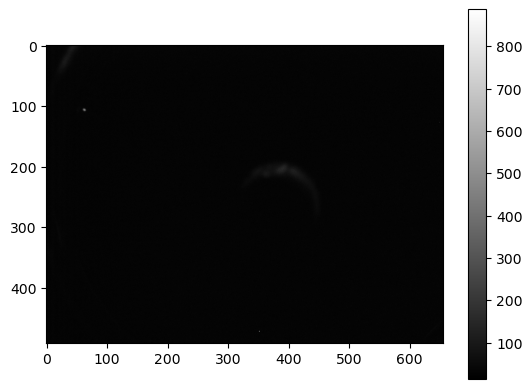

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

file_path = r"C:\Users\Lab10\Desktop\Automated RHEED Image Acquisition\Acquiring Images Via Python Script Tests\Stream Images\2025-09-17_10-47-37-371462.npy"
array = np.load(file_path)
squeezed_array = array.squeeze()
plt.imshow(squeezed_array, cmap='grey')
plt.colorbar()  # Optional: add a color bar to the side for reference
plt.show()

## Pyside GUI Setup

In [2]:
import random
import sys
from PySide6 import QtCore, QtWidgets, QtGui

class MyWidget(QtWidgets.QWidget):
    def __init__(self):
        super().__init__()

        self.hello = ["Hallo Welt", "Hei maailma", "Hola Mundo", "Привет мир"]

        self.button = QtWidgets.QPushButton("Click me!")
        self.text = QtWidgets.QLabel("Hello World",
                                     alignment=QtCore.Qt.AlignCenter)

        self.layout = QtWidgets.QVBoxLayout(self)
        self.layout.addWidget(self.text)
        self.layout.addWidget(self.button)

        self.button.clicked.connect(self.magic)

    @QtCore.Slot()
    def magic(self):
        self.text.setText(random.choice(self.hello))

if __name__ == "__main__":
    app = QtWidgets.QApplication([])

    widget = MyWidget()
    widget.resize(800, 600)
    widget.show()

    sys.exit(app.exec())

RuntimeError: Please destroy the QApplication singleton before creating a new QApplication instance.

## Get intensity of an image

497


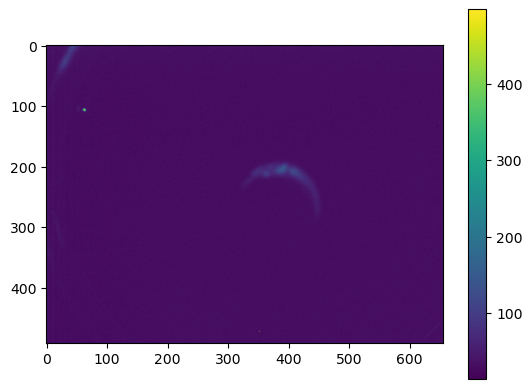

(492, 656)
10166347
(492, 656)
10166347


In [11]:
import matplotlib.pyplot as plt
import numpy as np

file_path = r"C:\Users\Lab10\Desktop\Automated RHEED Image Acquisition\RHEED Viewer\Acquiring Images Via Python Script Tests\Single Images\165.00_2025-09-18_11-39-26-590741.npy"
array = np.load(file_path)
squeezed_array = array.squeeze()
print(np.max(array))
plt.imshow(squeezed_array)
plt.colorbar()  # Optional: add a color bar to the side for reference
plt.show()

# Get sum of intensity of image
intensity = squeezed_array.sum()
print(squeezed_array.shape)
sub_array = squeezed_array[0:1700, 0:4000]
print(intensity)
print(sub_array.shape)
print(sub_array.sum())

## Convert BMP images to numpy and vice versa

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the BMP image
image_path = r"C:\Users\Lab10\Desktop\Automated RHEED Image Acquisition\Other RHEED Test Images\RR220204A_165C_0217.bmp"
img = Image.open(image_path)

# Plot bitmap image
plt.imshow(img, cmap='grey')
plt.colorbar()  # Optional: add a color bar to the side for reference
plt.show()

numpy_load = r"C:\Users\Lab10\Desktop\Automated RHEED Image Acquisition\RHEED Viewer\Acquiring Images Via Python Script Tests\Single Images\165.00_2025-09-19_15-22-12-594518.npy"
# Convert the image to a NumPy array
numpy_array = np.asarray(img)
print(np.max(numpy_array))
plt.imshow(numpy_array, cmap='grey' )
plt.colorbar()  # Optional: add a color bar to the side for reference
plt.show()
# print(f"NumPy array shape: {numpy_array.shape}")
# print(f"NumPy array data type: {numpy_array.dtype}")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2473770902.py, line 14)